# Urban Sound Classification

* Here i try to classify different audio which are present on the dataset.
* The main thing i am trying to do here is trying to convert audio in an image and then use the CNN to 
  classify the images/audio into the given classes.
* Here we use the UrbanSound8k dataset .

In [1]:
import numpy as np
import librosa , os
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from PIL import Image
from numpy import asarray
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from array import array
import cv2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

2024-06-26 19:02:16.902476: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 19:02:16.902599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 19:02:17.035573: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import tensorflow as tf

In [3]:
# def create_spectrogram(audio_file, image_file):
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

#     y, sr = librosa.load(audio_file)
#     ms = librosa.feature.melspectrogram(y=y, sr=sr)
#     log_ms = librosa.power_to_db(ms, ref=np.max)
#     librosa.display.specshow(log_ms, sr=sr)

#     fig.savefig(image_file)
#     plt.close(fig)
    
# def create_pngs_from_wavs(input_path, output_path):
#     if not os.path.exists(output_path):
#         os.makedirs(output_path)

#     dir = os.listdir(input_path)

#     for i, file in enumerate(dir):
#         input_file = os.path.join(input_path, file)
#         if(file == '.DS_Store'):
#             continue
#         output_file = os.path.join(output_path, file.replace('.wav', '.png'))
#         create_spectrogram(input_file, output_file)
#         # print(input_file)

In [4]:
folders = next(os.walk('/kaggle/input/urbansound8k'))[1]
folders

['fold7',
 'fold1',
 'fold3',
 'fold5',
 'fold10',
 'fold9',
 'fold8',
 'fold4',
 'fold2',
 'fold6']

## Creating spectograms from audio files.

* I am using files from my pc to convert the audio files into images you can use the below code.

In [5]:
# for i in range(len(folders)):
#     print(i+1,"/",len(folders))
#     create_pngs_from_wavs(os.path.join('/kaggle/input/urbansound8k',folders[i]),os.path.join('/kaggle/working/urbansound8k',folders[i]))

In [6]:
data = pd.read_csv('/kaggle/input/urbansound8k/UrbanSound8K.csv')
data

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [7]:
temp = data['slice_file_name']
temp = temp.tolist()
fileName = [x.replace('wav','png') for x in temp]
labels = data['class'].tolist()
folder = data['fold'].tolist()

In [8]:
def show_images(images,labels):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

In [9]:
len(folder)
d = dict(pd.Series(labels).value_counts())
print(d)
print(len(d.keys()))
print(d.keys())

{'dog_bark': 1000, 'children_playing': 1000, 'air_conditioner': 1000, 'street_music': 1000, 'jackhammer': 1000, 'engine_idling': 1000, 'drilling': 1000, 'siren': 929, 'car_horn': 429, 'gun_shot': 374}
10
dict_keys(['dog_bark', 'children_playing', 'air_conditioner', 'street_music', 'jackhammer', 'engine_idling', 'drilling', 'siren', 'car_horn', 'gun_shot'])


In [10]:
# now let's try to take 50 audio sounds from each of the type as i have to take less of data 

In [11]:
data[data['class']=="dog_bark"]

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
14,100652-3-0-0.wav,100652,0.000000,4.000000,1,2,3,dog_bark
15,100652-3-0-1.wav,100652,0.500000,4.500000,1,2,3,dog_bark
16,100652-3-0-2.wav,100652,1.000000,5.000000,1,2,3,dog_bark
17,100652-3-0-3.wav,100652,1.500000,5.500000,1,2,3,dog_bark
...,...,...,...,...,...,...,...,...
8594,97193-3-0-4.wav,97193,2.000000,6.000000,1,2,3,dog_bark
8595,97193-3-0-6.wav,97193,3.000000,7.000000,1,2,3,dog_bark
8611,97392-3-0-0.wav,97392,0.000000,2.773946,1,6,3,dog_bark
8618,97756-3-0-0.wav,97756,0.141727,1.290466,1,10,3,dog_bark


In [12]:
data[data["class"]=="gun_shot"]

,slice_file_name,fsID,start,end,salience,fold,classID,class
106,102305-6-0-0.wav,102305,0.000000,2.611610,1,1,6,gun_shot
496,106955-6-0-0.wav,106955,0.495575,1.649031,1,9,6,gun_shot
611,110622-6-0-0.wav,110622,0.000000,1.501211,1,3,6,gun_shot
626,111048-6-0-0.wav,111048,0.000000,1.314579,1,6,6,gun_shot
1000,122690-6-0-0.wav,122690,12.231953,15.377840,1,1,6,gun_shot
...,...,...,...,...,...,...,...,...
8100,78776-6-0-0.wav,78776,0.094899,2.613121,1,3,6,gun_shot
8271,84254-6-0-0.wav,84254,0.314041,1.369388,1,5,6,gun_shot
8321,86278-6-0-0.wav,86278,0.242924,1.384127,1,1,6,gun_shot
8331,87562-6-0-0.wav,87562,0.000000,3.044845,1,9,6,gun_shot


In [13]:
image_paths = []
image_label = []

for key in d.keys():
    df = data[data["class"]==key]
    temp = df['slice_file_name']
    temp = temp.tolist()
    fileName = [x.replace('wav','png') for x in temp]
    labels = df['class'].tolist()
    folder = df['fold'].tolist()
    path = '/kaggle/input/urbansound8kspectograms/spectrograms'
    for i in range(51):
        image_paths.append(os.path.join(path,'fold'+str(folder[i]),fileName[i]))
        image_label.append(labels[i])

In [14]:
print(image_paths[:10])
print(image_label[:10])

['/kaggle/input/urbansound8kspectograms/spectrograms/fold5/100032-3-0-0.png', '/kaggle/input/urbansound8kspectograms/spectrograms/fold2/100652-3-0-0.png', '/kaggle/input/urbansound8kspectograms/spectrograms/fold2/100652-3-0-1.png', '/kaggle/input/urbansound8kspectograms/spectrograms/fold2/100652-3-0-2.png', '/kaggle/input/urbansound8kspectograms/spectrograms/fold2/100652-3-0-3.png', '/kaggle/input/urbansound8kspectograms/spectrograms/fold10/100795-3-0-0.png', '/kaggle/input/urbansound8kspectograms/spectrograms/fold10/100795-3-1-0.png', '/kaggle/input/urbansound8kspectograms/spectrograms/fold10/100795-3-1-1.png', '/kaggle/input/urbansound8kspectograms/spectrograms/fold10/100795-3-1-2.png', '/kaggle/input/urbansound8kspectograms/spectrograms/fold6/101281-3-0-0.png']
['dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark']


(480, 640, 4)


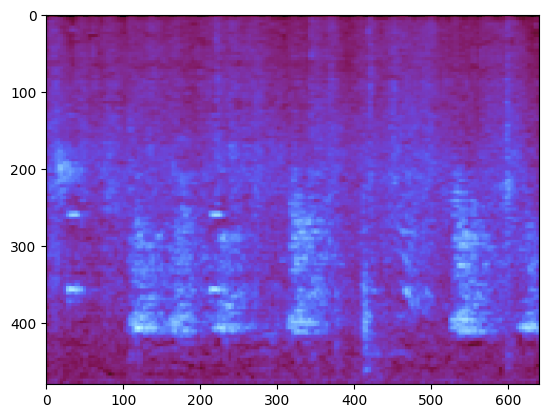

In [15]:
img = cv2.imread(image_paths[10],cv2.IMREAD_UNCHANGED)
print(img.shape)

plt.imshow(img)
plt.show()

In [16]:
x=[] # an array of images
y=[] # an array of the corresponding labels

# write a loop to populate all bro
for i in range(len(image_paths)):
    # load the image
    path = image_paths[i]
    image = cv2.imread(path,cv2.IMREAD_COLOR)
    # convert image to numpy array
    image = cv2.resize(image,(320,240))
    x.append(image)
    y.append(image_label[i])

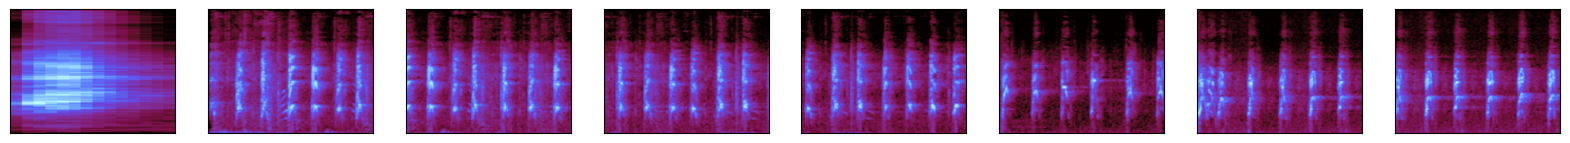

In [17]:
# the images look like
show_images(x[:10],y[:10])

In [18]:
print(len(x))

510


In [19]:
list_labels = list(set(y))
print(list_labels)
dict_labels = {}
for i in range(len(list_labels)):
    dict_labels[list_labels[i]] = i
print(dict_labels)
labels_encoded = []
for label in y:
    labels_encoded.append(dict_labels[label])
print(labels_encoded)

['dog_bark', 'engine_idling', 'car_horn', 'jackhammer', 'street_music', 'gun_shot', 'children_playing', 'drilling', 'air_conditioner', 'siren']
{'dog_bark': 0, 'engine_idling': 1, 'car_horn': 2, 'jackhammer': 3, 'street_music': 4, 'gun_shot': 5, 'children_playing': 6, 'drilling': 7, 'air_conditioner': 8, 'siren': 9}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [20]:
y = tf.keras.utils.to_categorical(labels_encoded,10)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

x_train = np.array(x_train)/255.0 # to normalize we need this bro
x_test = np.array(x_test)/255.0 

In [22]:
print(x_train.shape)
print(y_train.shape) # as this will help us to tell ki shape kya hogi hamare model mein bro 

(382, 240, 320, 3)
(382, 10)


In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 238, 318, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 119, 159, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 117, 157, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 58, 78, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 76, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 38, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 26, 36, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 59904)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │    61,342,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,833,610 (235.88 MB)

 Trainable params: 61,833,610 (235.88 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
checkpointer=ModelCheckpoint(
    'saved_models/rainedModelOnAllData.keras',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
)

In [29]:
es=EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=10,restore_best_weights=True)

In [30]:
hist = model.fit(x_train, 
                 y_train, 
                 validation_data=(x_test, y_test), 
                 batch_size=16, 
                 epochs=20,
                 callbacks=[checkpointer, es]
                )

Epoch 1/20
 2/24 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.0312 - loss: 3.2264    

W0000 00:00:1719428745.663572     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.1219 - loss: 2.8315

W0000 00:00:1719428752.843742     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.25781, saving model to saved_models/rainedModelOnAllData.keras


W0000 00:00:1719428754.032415     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 536ms/step - accuracy: 0.1234 - loss: 2.8179 - val_accuracy: 0.2578 - val_loss: 2.1097
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1822 - loss: 2.2721
Epoch 2: val_accuracy improved from 0.25781 to 0.30469, saving model to saved_models/rainedModelOnAllData.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.1834 - loss: 2.2667 - val_accuracy: 0.3047 - val_loss: 1.8468
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3667 - loss: 1.7068
Epoch 3: val_accuracy improved from 0.30469 to 0.48438, saving model to saved_models/rainedModelOnAllData.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.3680 - loss: 1.7046 - val_accuracy: 0.4844 - val_loss: 1.5668
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5522 - loss: 1.3836
Epoch 4: val_accuracy improved from 0.48438 to 0.66406, saving model to saved_models/rainedModelOnAllData.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.55

Max Accuracy :  0.90625


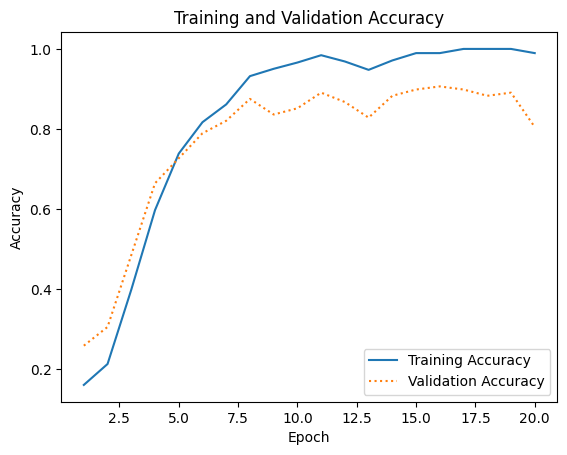

In [33]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

print("Max Accuracy : ",np.max(val_acc))

[]

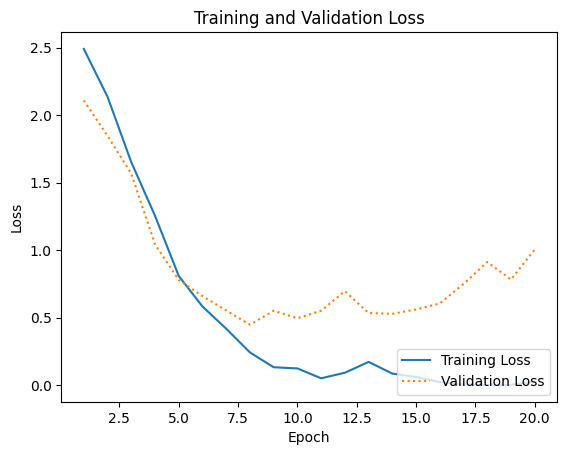

In [32]:
acc = hist.history['loss']
val_acc = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Loss')
plt.plot(epochs, val_acc, ':', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.plot()